INTRODUCTION
 
This project will examine whether mental health, physical health, sleep (specifically, the lack of it), and BMI are risk factors for heart disease. Though this project will test all four of those variables and include their analyses, my specific focus/hypothesis will focus on the mental health variable. I hypothesize that mental health will be a statistically significant risk factor for heart disease, and this project will examine mental health's effect on heart disease. For the other variables, I predict they will also be reliable risk factors, as they are already commonly-known risk factors by health organizations such as the CDC for heart disease and heart disease-related conditions.
 
I chose to explore this because according to the CDC, heart disease is one of the leading causes of death for men, women, and people of most racial/ethnic groups in the United States. There is a bevy of research on many of the other risk factors (drinking, smoking, obesity, age, etc.) but mental health is often overlooked, specifically when relating it to physical health. On a personal level, heart disease is a long-running health issue in my family, and in the South Asian population in general. Mental health is also highly stigmatized in both of those cases. Additionally, I have an interest in medicine, healthcare, and epidemiology, so I thought it would be interesting to explore this.
 
I found a dataset on Kaggle, an online community of data scientists and machine learning practitioners. The dataset was in a .csv file format and originally came from an annual telephone survey by the CDC's Behavioural Risk Factor Surveillance System (BRFSS) to gather data on the health status of U.S. residents. The dataset was formatted into a .csv file and published by Kaggle user Kamil Pytlak, as he "decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects." The file is open to the public domain, and the source is linked below.
 
Source of dataset:

Pytlak, K. (2022, February 16). Personal key indicators of heart disease. Kaggle. Retrieved December 1, 2022, from https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download 

DATA ORGANIZATION & PROCESSING

The following code loads the data frame, stores them seperately as needed, and makes overall changes to the database. The purpose of each step is indicated with comments. 

In [190]:
# Importing all the libraries needed for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

df = pd.read_csv(r'heart_2020.csv') # Loading the .csv file and storing it as a dataframe variable
df.head() # Displaying the first five rows to examine if the file loaded correctly

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [191]:
# Removing all the factors that I will not be investigating by dropping their columns
df = df.drop('DiffWalking', axis = 1) # Removes the difficulty walking variable from the dataframe
df = df.drop('KidneyDisease', axis = 1) # Removes the kidney disease variable from the dataframe
df = df.drop('SkinCancer', axis = 1) # Removes the skin cancer variable from the dataframe
df = df.drop('GenHealth', axis = 1) # Removes the general health variable from the dataframe
df = df.drop('Smoking', axis = 1) # Removes the smoking variable from the dataframe
df = df.drop('Sex', axis = 1) # Removes the sex variable from the dataframe
df = df.drop('AgeCategory', axis = 1) # Removes the age variable from the dataframe
df = df.drop('Race', axis = 1) # Removes the race variable from the dataframe
df = df.drop('Diabetic', axis = 1) # Removes the diabetic variable from the dataframe
df = df.drop('AlcoholDrinking', axis = 1) # Removes the alcohol drinking variable from the dataframe
df = df.drop('Stroke', axis = 1) # Removes the stroke variable from the dataframe
df = df.drop('Asthma', axis = 1) # Removes the asthma variable from the dataframe
df = df.drop('PhysicalActivity', axis = 1) # Removes the physical activity variable from the dataframe

df # Displaying the newly revised dataframe

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,No,16.60,3,30,5
1,No,20.34,0,0,7
2,No,26.58,20,30,8
3,No,24.21,0,0,6
4,No,23.71,28,0,8
...,...,...,...,...,...
319790,Yes,27.41,7,0,6
319791,No,29.84,0,0,5
319792,No,24.24,0,0,6
319793,No,32.81,0,0,12


VARIABLES EXPLANATION

HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

BMI: Body Mass Index (BMI)

PhysicalHealth: "For how many days during the past 30 days was your physical health not good? (0-30 days)"

MentalHealth: "For how many days during the past 30 days was your mental health not good? (0-30 days)

SleepTime: "On average, how many hours of sleep do you get in a 24-hour period?"

In [192]:
df.isnull().sum() # Checking for null values by summing number of empty cells in each column

HeartDisease      0
BMI               0
PhysicalHealth    0
MentalHealth      0
SleepTime         0
dtype: int64

In [193]:
# Check the columns to see if they are catagorical or not and indexing them as Boolean values (True or False)
cat = (df.dtypes == 'object')
cat_object = list(cat[cat].index)

print("Categorical variable(s):", cat_object) # Printing the name of the catagorical variable(s) in the dataframe

Categorical variable(s): ['HeartDisease']


In [194]:
cat_column = ["HeartDisease"] # Storing the only catagorical variable Heart Disease
df[cat_column] = df[cat_column].apply(lambda x: x.map({'Yes':1,'No':0})) # Assigning the catagorical variable a binary value where no heart disease is 0 and has heart disease is 1
df.head() # Displaying the first five rows to examine if Heart Disease now says 0 for No

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,16.60,3,30,5
1,0,20.34,0,0,7
2,0,26.58,20,30,8
3,0,24.21,0,0,6
4,0,23.71,28,0,8


In [195]:
print(df.shape) # Printing the number of columns and rows (there is are 319795 rows of data and 5 columns of variables)

print(df.HeartDisease.value_counts()) # Counting the number of individuals who have heart disease, where 0 means they do not have heart disease and 1 means they do

(319795, 5)
0    292422
1     27373
Name: HeartDisease, dtype: int64


DATA VISUALIZATION: EXAMINING THE DATA

Text(1.75, -5, 'Faiz Shakoor')

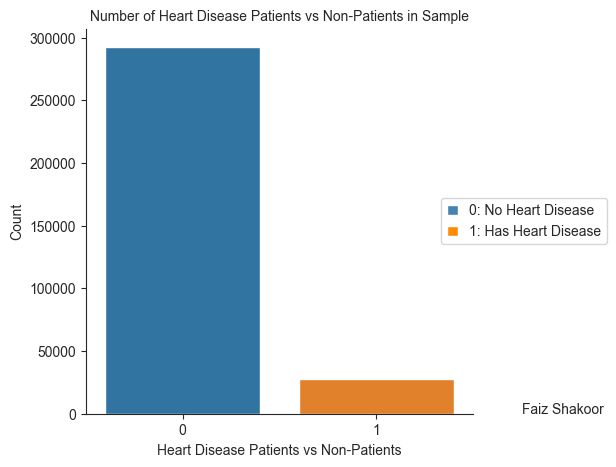

In [196]:
fontsize = 10 # Setting the fontsize to 10
sns.set_style("ticks") # Setting the seaborn style to ticks to remove the background and make it cleaner (aligns with the "Making Nicer Graphs" lecture parameters)
sns.set_context({"figure.figsize": (5, 5)}) # Setting the size of the figure
freq_plt = sns.countplot(x='HeartDisease', data=df) # Plotting heart disease patients as a countplot (bar graph)
freq_plt.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize) # Sets the x axis label
freq_plt.set_ylabel('Count', fontsize=fontsize) # Sets the y axis label
freq_plt.set_title('Number of Heart Disease Patients vs Non-Patients in Sample', fontsize=fontsize) # Sets the title
freq_plt.tick_params(labelsize=fontsize) # Sets the tick labels to the fontsize
freq_plt.spines['top'].set_visible(False) # Removes the top spine
freq_plt.spines['right'].set_visible(False) # Removes the right spine
handles, labels = plt.gca().get_legend_handles_labels() # Creates the rectangle for each element in the legend
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue") # Sets the colors in the legend
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange") # Sets the colors in the legend
# Creates a legend based on the style parameters (mainly to adhere to "Making Nicer Graphs" parameters so it works with Seaborn)
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],[label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"],handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(0.9, 0.5), ncol=1,fontsize=fontsize)
plt.text(1.75,-5,'Faiz Shakoor',fontsize=fontsize) # Adds my name at the bottom (also to adhere to "Making Nicer Graphs" parameters)

FIGURE 1 (Above)

The above figure displays a count of those with heart disease vs those who do not in the sample. 0 is the binary value assigned to those who do not have heart disease, while 1 is the binary value that represents those who do have heart disease.

DATA VISUALIZATION: BOX PLOTS

Text(2, -5, 'Faiz Shakoor')

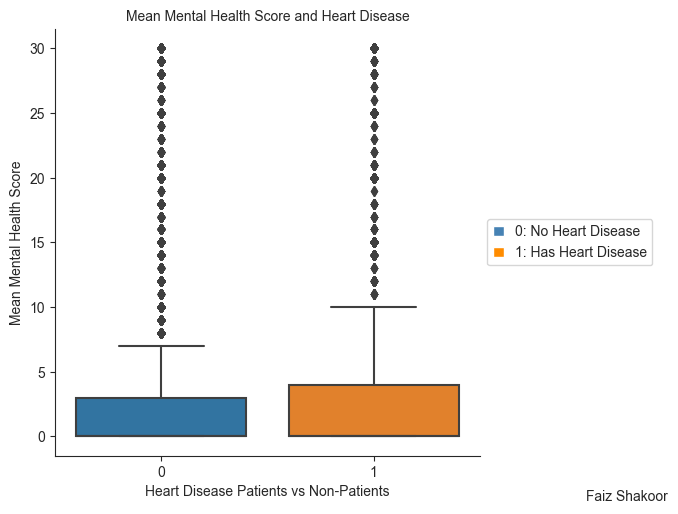

In [197]:
sns.set_style('ticks') # Sets the style to seaborn ticks
Mental_heart = sns.catplot(x='HeartDisease', y='MentalHealth', data=df, kind='box', legend=True) # Creates a box plot comparing mean mental health score and heart disease status
Mental_heart.fig.set_size_inches(5,5) # Sets the figure size
ax = Mental_heart.facet_axis(0, 0) # Sets the axis
ax.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize) # Sets the x axis label
ax.set_ylabel('Mean Mental Health Score', fontsize=fontsize) # Sets the y axis label
ax.set_title('Mean Mental Health Score and Heart Disease', fontsize=fontsize) # Sets the title
ax.tick_params(labelsize=fontsize) # Sets the tick labels to the fontsize
ax.spines['top'].set_visible(False) # Removes the top spine
ax.spines['right'].set_visible(False) # Removes the right spine
# Legend formatting below
handles, labels = plt.gca().get_legend_handles_labels()
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue")
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],
           [label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"], 
           handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,fontsize=fontsize)
# Name added
ax.text(2,-5,'Faiz Shakoor',fontsize=fontsize)

FIGURE 2 (Above)

The above figure is a box plot that compares the mean mental health scores of those with and without heart disease, where they seem to have the same minimum and lower quartile, but the heart disease group looks like it has a higher upper quartile score and higher maximum mental heath score. This means that visually, it seems that those with heart disease have a higher mental health score (feel mentally worse more days in a month) than those without heart disease.

Text(2, -5, 'Faiz Shakoor')

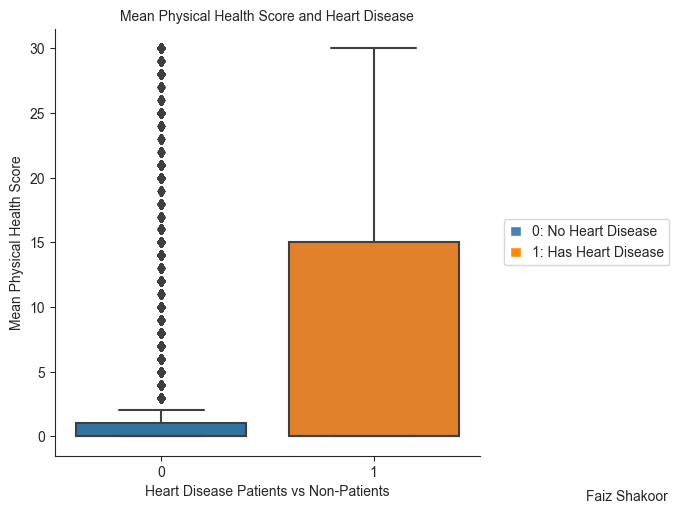

In [198]:
# Same formatting for this box plot as above, now for Physical Health vs Heart Disease
sns.set_style('ticks')
Physical_heart = sns.catplot(x='HeartDisease', y='PhysicalHealth', data=df, kind='box', legend=True)
Physical_heart.fig.set_size_inches(5,5)
ax = Physical_heart.facet_axis(0, 0)
ax.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize)
ax.set_ylabel('Mean Physical Health Score', fontsize=fontsize)
ax.set_title('Mean Physical Health Score and Heart Disease', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=fontsize)
handles, labels = plt.gca().get_legend_handles_labels()
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue")
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],
           [label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"], 
           handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(1.04, 0.5), ncol=1,fontsize=fontsize)
ax.text(2,-5,'Faiz Shakoor',fontsize=fontsize)

FIGURE 3 (Above)

The above figure is a box plot that compares the mean physical health scores of those with and without heart disease, where they seem to have the same minimum and lower quartile, but the heart disease group looks like it has a higher upper quartile score and higher maximum physical heath score. This means that visually, it seems that those with heart disease have a higher physical health score (feel physically worse more days in a month) than those without heart disease.

Text(2, -3, 'Faiz Shakoor')

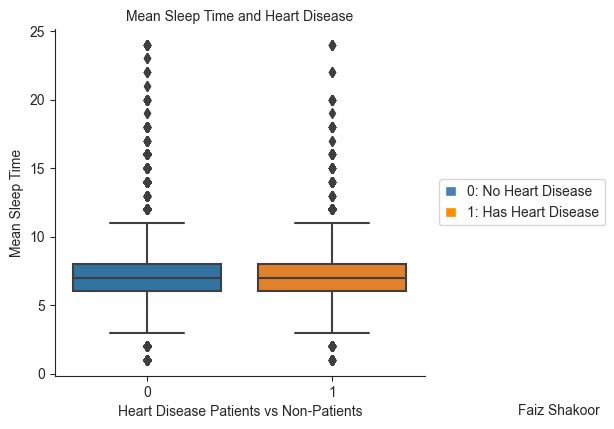

In [199]:
# Same formatting for this box plot as above, now for Sleep Time vs Heart Disease
sns.set_style('ticks')
Sleep_heart = sns.catplot(x='HeartDisease', y='SleepTime', data=df, kind='box', legend=True)
Sleep_heart.fig.set_size_inches(5,5)
Sleep_heart.fig.subplots_adjust(top=0.81,right=0.86)
ax = Sleep_heart.facet_axis(0, 0)
ax.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize)
ax.set_ylabel('Mean Sleep Time', fontsize=fontsize)
ax.set_title('Mean Sleep Time and Heart Disease', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=fontsize)
handles, labels = plt.gca().get_legend_handles_labels()
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue")
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],
           [label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"], 
           handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,fontsize=fontsize)
ax.text(2,-3,'Faiz Shakoor',fontsize=fontsize)

FIGURE 4 (Above)

The above figure is a box plot that compares the mean sleep times of those with and without heart disease. The minimum, lower quartile, median, upper quartile and maximum seem visually similar. This means that visually, it seems that those with heart disease have similar hours of sleep than those without heart disease.

Text(2, -3, 'Faiz Shakoor')

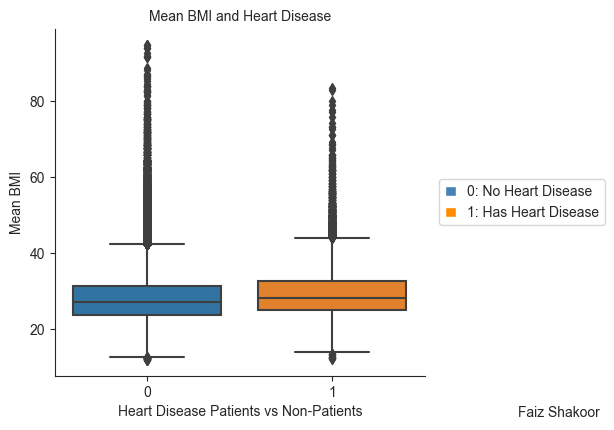

In [200]:
# Same formatting for this box plot as above, now for BMI vs Heart Disease
sns.set_style('ticks')
BMI_heart = sns.catplot(x='HeartDisease', y='BMI', data=df, kind='box', legend=True)
BMI_heart.fig.set_size_inches(5,5)
BMI_heart.fig.subplots_adjust(top=0.81,right=0.86)
ax = BMI_heart.facet_axis(0, 0)
ax.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize)
ax.set_ylabel('Mean BMI', fontsize=fontsize)
ax.set_title('Mean BMI and Heart Disease', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = plt.gca().get_legend_handles_labels()
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue")
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],
           [label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"], 
           handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,fontsize=fontsize)
ax.text(2,-3,'Faiz Shakoor',fontsize=fontsize)

FIGURE 5 (Above)

The above figure is a box plot that compares the mean BMIs of those with and without heart disease. The minimum, lower quartile, median, upper quartile, and maximum for the heart disease group all seems slightly higher. This means that visually, it seems that those with heart disease have a slighly higher BMI than those without heart disease.

DATA VISUALIZATION: BAR GRAPHS

Text(2, -0.5, 'Faiz Shakoor')

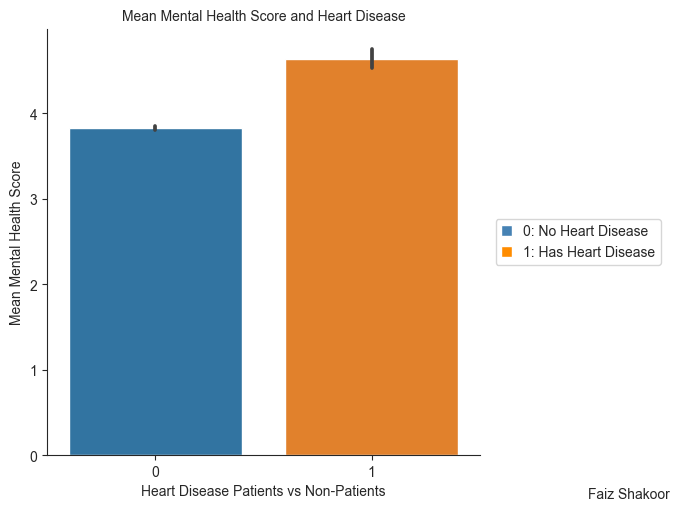

In [201]:
sns.set_style('ticks') # Sets ticks seaborn style
Mental_heart = sns.catplot(x='HeartDisease', y='MentalHealth', data=df, kind='bar', legend=True) # Creates bar graphs comparing mean mental health score and heart disease status
Mental_heart.fig.set_size_inches(5,5) # Sets figure size
ax = Mental_heart.facet_axis(0, 0) # Sets axis
# X axis, y axis and title labels
ax.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize)
ax.set_ylabel('Mean Mental Health Score', fontsize=fontsize)
ax.set_title('Mean Mental Health Score and Heart Disease', fontsize=fontsize)
# Font size and top/right spines removed
ax.tick_params(labelsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Legend formatting below
handles, labels = plt.gca().get_legend_handles_labels()
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue")
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],
           [label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"], 
           handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,fontsize=fontsize)
# Name added
ax.text(2,-0.5,'Faiz Shakoor',fontsize=fontsize)

FIGURE 6 (Above)

The above figure are bar graphs comparing the mean mental health scores of those without heart disease to those who do. It seems visually that the group with heart disease has a higher mean mental health score than those who do not within the error/uncertainty bars.

Text(2, -0.6, 'Faiz Shakoor')

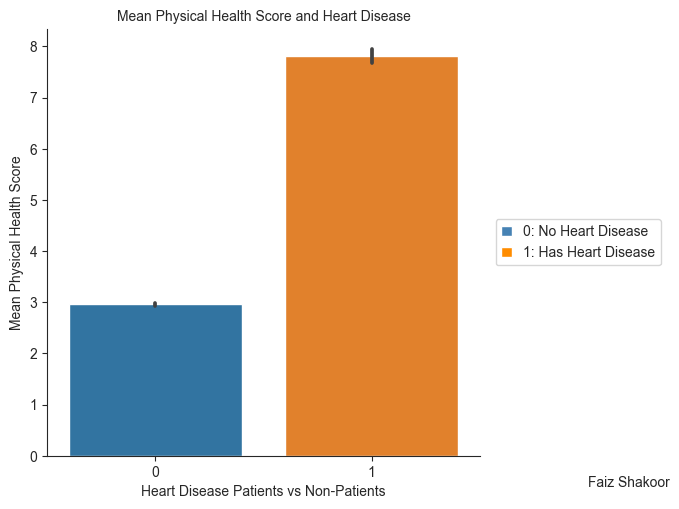

In [202]:
# Same formatting for these bar graphs as above, now for Physical Health score vs Heart Disease
sns.set_style('ticks')
Physical_heart = sns.catplot(x='HeartDisease', y='PhysicalHealth', data=df, kind='bar', legend=True)
Physical_heart.fig.set_size_inches(5,5)
ax = Physical_heart.facet_axis(0, 0)
ax.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize)
ax.set_ylabel('Mean Physical Health Score', fontsize=fontsize)
ax.set_title('Mean Physical Health Score and Heart Disease', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = plt.gca().get_legend_handles_labels()
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue")
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],
           [label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"], 
           handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,fontsize=fontsize)
ax.text(2,-0.6,'Faiz Shakoor',fontsize=fontsize)

FIGURE 7 (Above)

The above figure are bar graphs comparing the mean physical health scores of those without heart disease to those who do. It seems visually that the group with heart disease has a much higher mean physical health score than those who do not within the error/uncertainty bars.

Text(2, -0.7, 'Faiz Shakoor')

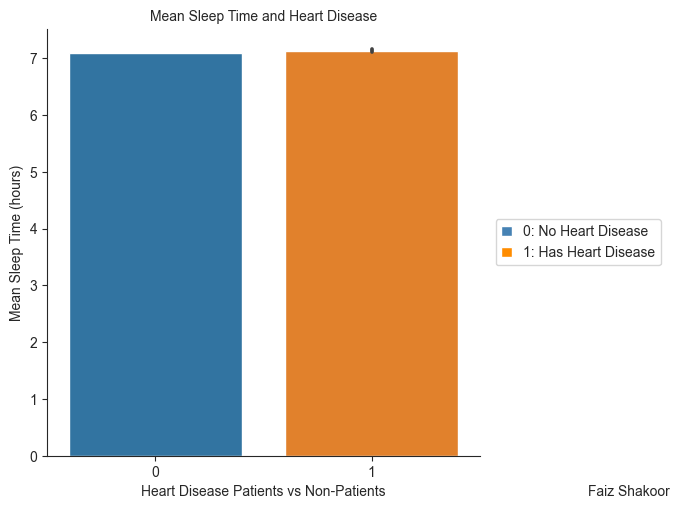

In [203]:
# Same formatting for these bar graphs as above, now for Sleep Time vs Heart Disease
sns.set_style('ticks')
Mental_heart = sns.catplot(x='HeartDisease', y='SleepTime', data=df, kind='bar', legend=True)
Mental_heart.fig.set_size_inches(5,5)
ax = Mental_heart.facet_axis(0, 0)
ax.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize)
ax.set_ylabel('Mean Sleep Time (hours)', fontsize=fontsize)
ax.set_title('Mean Sleep Time and Heart Disease', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = plt.gca().get_legend_handles_labels()
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue")
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],
           [label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"], 
           handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,fontsize=fontsize)
ax.text(2,-0.7,'Faiz Shakoor',fontsize=fontsize)

FIGURE 8 (Above)

The above figure are bar graphs comparing the mean sleep times of those without heart disease to those who do. The sleep times seem visually very similar, but the group with heart disease has a slighly higher sleep time (hours sleeping every day) than those who do not have heart disease.

Text(2, -3.5, 'Faiz Shakoor')

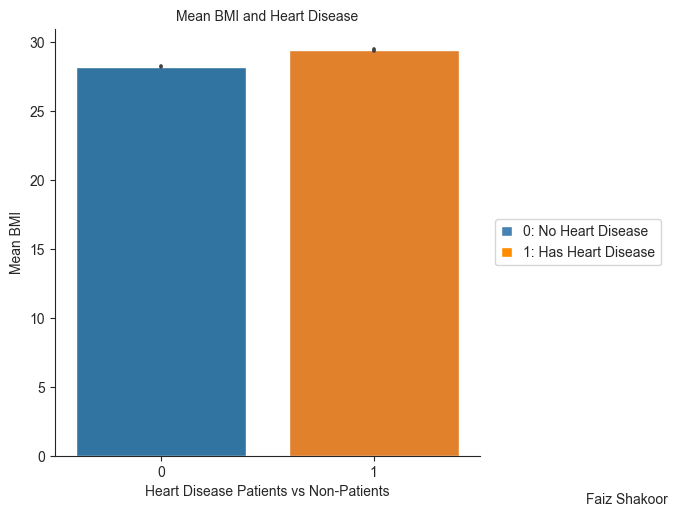

In [204]:
# Same formatting for these bar graphs as above, now for BMI vs Heart Disease
sns.set_style('ticks')
Physical_heart = sns.catplot(x='HeartDisease', y='BMI', data=df, kind='bar', legend=True)
Physical_heart.fig.set_size_inches(5,5)
ax = Physical_heart.facet_axis(0, 0)
ax.set_xlabel('Heart Disease Patients vs Non-Patients', fontsize=fontsize)
ax.set_ylabel('Mean BMI', fontsize=fontsize)
ax.set_title('Mean BMI and Heart Disease', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = plt.gca().get_legend_handles_labels()
noh = plt.Rectangle((0, 0), 1, 1, fc="steelblue")
hash = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[noh, hash],
           [label for i,label in enumerate(labels) if i in display]+["0: No Heart Disease", "1: Has Heart Disease"], 
           handlelength=0.8, handleheight=0.8,loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,fontsize=fontsize)
ax.text(2,-3.5,'Faiz Shakoor',fontsize=fontsize)

FIGURE 9 (Above)

The above figure are bar graphs comparing the mean BMIs of those without heart disease to those who do. It seems visually that the group with heart disease has a slighlu higher BMI than those who do not within the error/uncertainty bars.

DATA VISUALIZATION: STATISTICAL COMPARISON

3977851921.5
the p-value is 0.051433175597980295
Same distribution (fail to reject H0)
Patients with heart disease have a mean mental health score of 4.64176378182881
Patients without heart disease have a mean mental health score of 3.8287782724965975


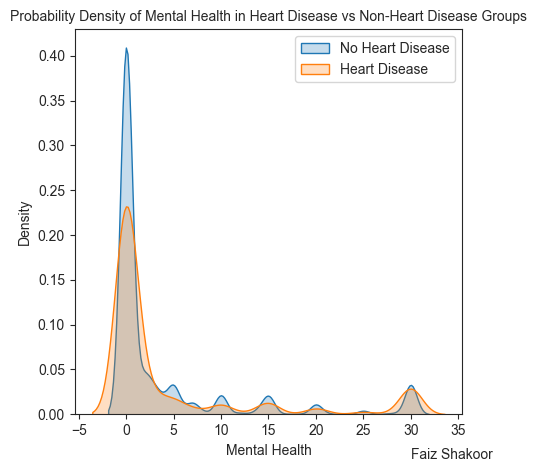

In [205]:
hasheartdisease = df[df['HeartDisease']==1] # Stores the individuals who have heart disease
hasheartdisease_MentalHealth = hasheartdisease['MentalHealth'] # Stores the individuals who have heart disease and their mental health score

noheartdisease = df[df['HeartDisease']==0] # Stores the individuals who do not have heart disease
noheartdisease_MentalHealth = noheartdisease['MentalHealth'] # Stores the individuals who do not have heart disease and their mental health score

U1, p = mannwhitneyu(hasheartdisease_MentalHealth, noheartdisease_MentalHealth) # Uses scipy library to run a Mann-Whitney U test between the mental health score of those with heart disease vs no heart disease
print(U1) # Prints the U value
print("the p-value is", p) # Prints the p-value
alpha = 0.05 # Sets the alpha at 0.05
if p > alpha: # If statment that prints if p value is > 0.05
    print('Same distribution (fail to reject H0)')
else: # Else statment that prints when p value is not > 0.05
    print('Different distribution (reject H0)')
    
sns.kdeplot(data=noheartdisease_MentalHealth, fill=True, label='No Heart Disease') # Creates a kernel density plot to plot the density vs mental health scores of the non-heart disease group
sns.kdeplot(data=hasheartdisease_MentalHealth, fill=True, label='Heart Disease') # Creates a kernel density plot to plot the density vs mental health scores of the heart disease group
plt.legend() # Creates a legend
plt.xlabel('Mental Health', fontsize=fontsize) # Labels the x-axis
plt.ylabel('Density', fontsize=fontsize) # Labels the y-axis
plt.title('Probability Density of Mental Health in Heart Disease vs Non-Heart Disease Groups',fontsize=fontsize) # Labels the title
plt.text(30,-0.05,'Faiz Shakoor',fontsize=fontsize) # Adds name

print("Patients with heart disease have a mean mental health score of", hasheartdisease_MentalHealth.mean()) # Prints the mean mental health score of heart disease group
print("Patients without heart disease have a mean mental health score of", noheartdisease_MentalHealth.mean()) # Prints the mean mental health score of non-heart disease group

FIGURE 10 (Above)

Since the data for the four tested variables are not normally distributed I compared the two "HeartDisease" groups using a non-parametric test, the Mann-Whitney U test. The Mann-Whitney U test has a null hypothesis such that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X. Simply put, it is a non-parametric version of the t-test for unpaired data. The figure above shows Kernel Distribution Estimation Plots which depicts the probability density function of the continuous or non-parametric data variables (i.e. plotting  the univariate variables together). Here, it shows the probability density of the mental health scores of heart disease group (orange) vs the mental health scores of the non-heart disease group (blue).

4950388123.5
the p-value is 0.0
Different distribution (reject H0)
Patients with heart disease have a mean physical health score of 7.8082416980236
Patients without heart disease have a mean physical health score of 2.956415727954805


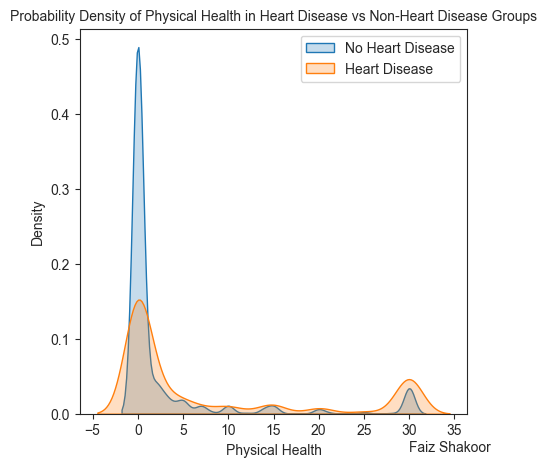

In [206]:
hasheartdisease_PhysicalHealth = hasheartdisease['PhysicalHealth'] # Stores the individuals who have heart disease and their physical health score
noheartdisease_PhysicalHealth = noheartdisease['PhysicalHealth'] # Stores the individuals who do not have heart disease and their physical health score

# Same Mann-Whitney U test as above but with physical health scores
U1, p = mannwhitneyu(hasheartdisease_PhysicalHealth, noheartdisease_PhysicalHealth)
print(U1)
print("the p-value is", p)
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    
# Same plot formatting as above but with physical health scores
sns.kdeplot(data=noheartdisease_PhysicalHealth, fill=True, label='No Heart Disease')
sns.kdeplot(data=hasheartdisease_PhysicalHealth, fill=True, label='Heart Disease')
plt.legend()
plt.xlabel('Physical Health', fontsize=fontsize)
plt.ylabel('Density', fontsize=fontsize)
plt.title('Probability Density of Physical Health in Heart Disease vs Non-Heart Disease Groups',fontsize=fontsize)
plt.text(30,-0.05,'Faiz Shakoor',fontsize=fontsize)

# Prints the mean physical health scores of both heart disease groups
print("Patients with heart disease have a mean physical health score of", hasheartdisease_PhysicalHealth.mean())
print("Patients without heart disease have a mean physical health score of", noheartdisease_PhysicalHealth.mean())

FIGURE 11 (Above)

The Kernel Distribution Estimation Plots above show the probability density of the physical health scores of heart disease group (orange) vs the physical health scores of the non-heart disease group (blue).

4062250690.5
the p-value is 2.109630603324657e-05
Different distribution (reject H0)
Patients with heart disease on average sleep 7.136156066196617 hours
Patients without heart disease on average sleep 7.093416364021858 hours


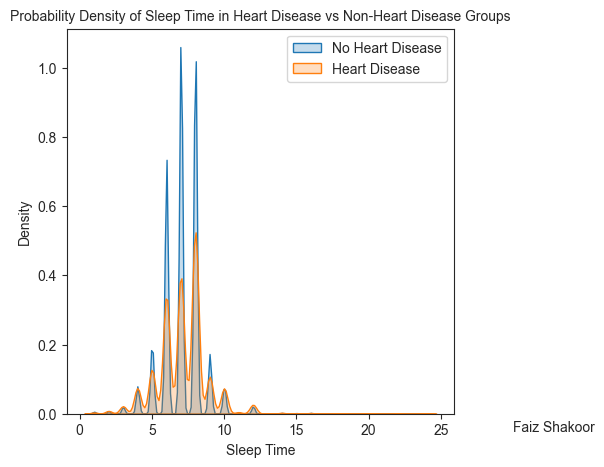

In [207]:
hasheartdisease_SleepTime = hasheartdisease['SleepTime'] # Stores the individuals who have heart disease and their sleep time
noheartdisease_SleepTime = noheartdisease['SleepTime'] # Stores the individuals who have do not have heart disease and their sleep time

# Same Mann-Whitney U test as above but with sleep times
U1, p = mannwhitneyu(hasheartdisease_SleepTime, noheartdisease_SleepTime)
print(U1)
print("the p-value is", p)
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    
# Same plot formatting as above but with sleep times
sns.kdeplot(data=noheartdisease_SleepTime, fill=True, label='No Heart Disease')
sns.kdeplot(data=hasheartdisease_SleepTime, fill=True, label='Heart Disease')
plt.legend()
plt.xlabel('Sleep Time', fontsize=fontsize)
plt.ylabel('Density', fontsize=fontsize)
plt.title('Probability Density of Sleep Time in Heart Disease vs Non-Heart Disease Groups',fontsize=fontsize)
plt.text(30,-0.05,'Faiz Shakoor',fontsize=fontsize)

# Prints the mean sleep times of both heart disease groups
print("Patients with heart disease on average sleep", hasheartdisease_SleepTime.mean(),"hours")
print("Patients without heart disease on average sleep", noheartdisease_SleepTime.mean(),"hours")

FIGURE 12 (Above)

The Kernel Distribution Estimation Plots above show the probability density of the sleep times of heart disease group (orange) vs the sleep times of the non-heart disease group (blue).

4475945989.5
the p-value is 9.008983218779159e-231
Different distribution (reject H0)
Patients with heart disease have a mean BMI of 29.401592079786653
Patients without heart disease have a mean BMI of 28.224658336240093


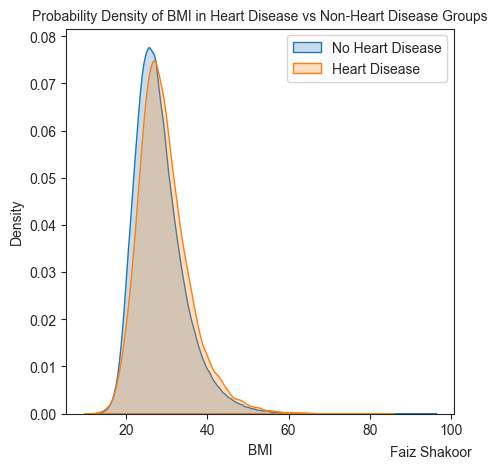

In [208]:
hasheartdisease_BMI = hasheartdisease['BMI'] # Stores the individuals who have heart disease and their BMI
noheartdisease_BMI = noheartdisease['BMI'] # Stores the individuals who do not have heart disease and their BMI

# Same Mann-Whitney U test as above but with BMI
U1, p = mannwhitneyu(hasheartdisease_BMI, noheartdisease_BMI)
print(U1)
print("the p-value is", p)
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    
# Same plot formatting as above but with BMI
sns.kdeplot(data=noheartdisease_BMI, fill=True, label='No Heart Disease')
sns.kdeplot(data=hasheartdisease_BMI, fill=True, label='Heart Disease')
plt.legend()
plt.xlabel('BMI', fontsize=fontsize)
plt.ylabel('Density', fontsize=fontsize)
plt.title('Probability Density of BMI in Heart Disease vs Non-Heart Disease Groups',fontsize=fontsize)
plt.text(85,-0.009,'Faiz Shakoor',fontsize=fontsize)

# Prints the mean BMI of both heart disease groups
print("Patients with heart disease have a mean BMI of", hasheartdisease_BMI.mean())
print("Patients without heart disease have a mean BMI of", noheartdisease_BMI.mean())

FIGURE 13 (Above)

The Kernel Distribution Estimation Plots above show the probability density of the BMIs of heart disease group (orange) vs the BMIs of the non-heart disease group (blue).

DISCUSSION
 
Looking first at mental health, based on the box plots and bar graphs, we can visually see that mean mental health scores (days not feeling mentally well out of a 30-day month) were higher (about 0.813 higher) in the group with heart disease. However, looking at the statistical results of the Mann-Whitney U Test, the p-value was greater than 0.05 and we failed to reject the null hypothesis. Therefore mental health scores are not significantly different between the two groups. However, the p-value is extremely close to 0.05, and we can visually see how much higher the mean mental health score is.
 
This means my original hypothesis was statistically proven false, however, practically speaking, those who have heart disease in the sample have more days feeling mentally unwell in a month than those who do not have heart disease (on average).
 
For physical health, based on the box plots and bar graphs, we can visually see that mean physical health scores (days not feeling physically well out of a 30-day month) were much higher (about 4.85 higher) in the group with heart disease. Looking at the statistical results of the Mann-Whitney U Test, the p-value was less than 0.05 and we reject the null hypothesis. Therefore, physical health scores are significantly different between the two groups. Practically speaking, those who have heart disease in the sample have more days of feeling physically unwell in a month than those who do not have heart disease (on average).
 
For sleep time, based on the box plots and bar graphs, we visually see that mean sleep times (hours asleep each day) were similar (only 0.00431 higher for the heart disease group) in both groups. However, looking at the statistical results of the Mann-Whitney U Test, the p-value was less than 0.05 and we reject the null hypothesis. Therefore sleep times are significantly different between the two groups. However, those with the heart disease group sleep more on average than those who do not have heart disease, which means that I cannot claim sleep deprivation as a risk factor for heart disease using this sample.
 
Finally looking at BMI, based on the box plots and bar graphs, we see that mean BMIs were slightly higher (about 1.177 higher) in the group with heart disease. The p-value was much less than 0.05 and we reject the null hypothesis. Therefore BMIs are significantly different between the two groups. Out of the following risk factors, BMI has the smallest p-value and is likely the best risk factor for heart disease out of the variables tested.
 
One limitation of my analysis was that the Mental Health and Physical Health score variables were subjectively reported, and likely not a good measure for whether these can be proper risk factors for heart disease. The only objective variable out of the four tested (BMI) also had the lowest p-value and was likely the best risk factor. Another limitation was that the dataset was non-normal, which may have statistically skewed the results, especially when working with binary/categorical data.